Data Analysis on Lip Reading Dataset

INITIAL INFO AND ANECDOTAL ANALYSIS:

This dataset is from 'Lip Reading in the Wild' from BBC (https://www.robots.ox.ac.uk/~vgg/data/lip_reading/lrw1.html). The total dataset is about 80GB consisting of videos that vary in length between 1/10 of a second up to 1/2 a second. The target words is accompanied by flanking context words (which may or may not be cut off depending on what is being spoken). The video angles range from head on to near profile angle, but trend towards facing more toward the camera and looking towards less than 80 degrees away. The levels of zoom are fairly consistant with the mouth of the person near the center of the video, and the top of the head either just below the top or slightly cut off. From looking through the video previews, it seems that a slight majority of the speakers are male. People with lighter skin tones make up a larger portion of the speakers. Most also appear to be shaven with few having significant facial hair. The lighting conditions in the videos vary in terms of brightness and tint, but most seem to be from a studio setting with a well lit face.

In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import subprocess as sb
from collections import Counter
import json
import ast
#Phonetics Libraries:
import epitran
import gruut_ipa

In [2]:
#Dataset contains 1100 videos per word. 1000 in training folder, 50 in test folder, and 50 in Val folder


totalDir = 0
totalFiles = 0
wordslist= []
trainset = []
testset = []
valset = []

dataset_folder = './lipread_mp4'

for base,dirs,files in os.walk(dataset_folder):
    for directories in dirs:
        totalDir += 1
        if directories == 'train':
            trainset.append(directories)
        elif directories == 'test':
            testset.append(directories)
        elif directories == 'val':
            valset.append(directories)
        else:
            wordslist.append(directories)
    for Files in files:
        totalFiles += 1

print('Total # of files :', totalFiles)
print('Toatal # of directories :', totalDir)
print('Number of words :', len(wordslist))
print('Wordlist :', wordslist)

Total # of files : 1077532
Toatal # of directories : 2000
Number of words : 500
Wordlist : ['ABOUT', 'ABSOLUTELY', 'ABUSE', 'ACCESS', 'ACCORDING', 'ACCUSED', 'ACROSS', 'ACTION', 'ACTUALLY', 'AFFAIRS', 'AFFECTED', 'AFRICA', 'AFTER', 'AFTERNOON', 'AGAIN', 'AGAINST', 'AGREE', 'AGREEMENT', 'AHEAD', 'ALLEGATIONS', 'ALLOWED', 'ALMOST', 'ALREADY', 'ALWAYS', 'AMERICA', 'AMERICAN', 'AMONG', 'AMOUNT', 'ANNOUNCED', 'ANOTHER', 'ANSWER', 'ANYTHING', 'AREAS', 'AROUND', 'ARRESTED', 'ASKED', 'ASKING', 'ATTACK', 'ATTACKS', 'AUTHORITIES', 'BECAUSE', 'BECOME', 'BEFORE', 'BEHIND', 'BEING', 'BELIEVE', 'BENEFIT', 'BENEFITS', 'BETTER', 'BETWEEN', 'BIGGEST', 'BILLION', 'BLACK', 'BORDER', 'BRING', 'BRITAIN', 'BRITISH', 'BROUGHT', 'BUDGET', 'BUILD', 'BUSINESS', 'BUSINESSES', 'CALLED', 'CAMERON', 'CAMPAIGN', 'CANCER', 'CANNOT', 'CAPITAL', 'CASES', 'CENTRAL', 'CERTAINLY', 'CHALLENGE', 'CHANCE', 'CHANGE', 'CHANGES', 'CHARGE', 'CHARGES', 'CHIEF', 'CHILD', 'CHILDREN', 'CLAIMS', 'CLEAR', 'CLOSE', 'CLOUD', 'COMES', 'C

Phonetics can provide an insight into the way words are spoken as it pertains to the part of the mouth being used and the sounds they are trying to create. While this analysis looks into the common form that these words are spoken, word pronounciation can vary by region or even person-to-person. This analysis attempts to gain insights by looking at the components of the words being used. 

In [3]:


#convert words to lowercase
lowercase_words = []
for single in wordslist:
    lowercase = single.lower()
    lowercase_words.append(lowercase)

allphonemes = []

epi = epitran.Epitran('eng-Latn', cedict_file='cedict_1_0_ts_utf-8_mdbg.txt')

#create dict of lists to add values as descriptions of phonemes are created
consonants = {"text": [], 'letters': [], "place": [], "voiced": []}
vowels = {'text': [], 'letters': [], 'height': [], 'placement': [], 'rounded': []}

def wordstophones(wordinsert):
#Function to change english word into phoneme representations (tends to match certain mouth movements/ways of saying word)
    phonword = epi.transliterate(wordinsert)
    return phonword
    
def phondescribe(fullphone):
#Takes phoneme for word, spaces it out, then adds description of phoneme to dictionary
    spacedphones = sb.run(['python3 -m gruut_ipa phones ' + fullphone], shell=True, capture_output=True, text=True)

    splitphone = spacedphones.stdout.split()

    for phone in splitphone:

        allphonemes.append(phone)

        description = sb.run(['python3 -m gruut_ipa describe ' + phone], shell=True, capture_output=True, text=True)

        description = description.stdout.replace('true','True').replace('false', 'False').replace('[]', 'None').replace('""', 'None')
        
        desdict = ast.literal_eval(description)

        if desdict["type"] == "Consonant":
            for k,v in desdict.items():
                if k in consonants.keys():
                    consonants[k].append(v)
                else:
                    continue
        elif desdict["type"] == "Vowel":
            for k,v in desdict.items():
                if k in vowels.keys():
                    vowels[k].append(v)
                else:
                    continue
        else:
            print('Error: Letter type not Consonant or Vowel')
    

In [5]:

#cycle through each word and perform above functions on them
for each_word in lowercase_words:
    #progress-check
    print('Current word:' + each_word)

    pronounciation = wordstophones(each_word)
    phondescribe(pronounciation)


Current word:about
Current word:absolutely
Current word:abuse
Current word:access
Current word:according
Current word:accused
Current word:across
Current word:action
Current word:actually
Current word:affairs
Current word:affected
Current word:africa
Current word:after
Current word:afternoon
Current word:again
Current word:against
Current word:agree
Current word:agreement
Current word:ahead
Current word:allegations
Current word:allowed
Current word:almost
Current word:already
Current word:always
Current word:america
Current word:american
Current word:among
Current word:amount
Current word:announced
Current word:another
Current word:answer
Current word:anything
Current word:areas
Current word:around
Current word:arrested
Current word:asked
Current word:asking
Current word:attack
Current word:attacks
Current word:authorities
Current word:because
Current word:become
Current word:before
Current word:behind
Current word:being
Current word:believe
Current word:benefit
Current word:benefits
C

In [6]:
#Construct Consonant and Vowel DataFrames
cons_dataframe = pd.DataFrame(consonants)
vow_dataframe = pd.DataFrame(vowels)

print(cons_dataframe.head())
print(vow_dataframe.head())

  text letters     place  voiced
0    b       b  bilabial    True
1    w       w  bilabial    True
2    t       t  alveolar   False
3    b       b  bilabial    True
4    s       s  alveolar   False
  text letters     height placement  rounded
0    ə       ə        mid   central    False
1    a       a       open     front    False
2    æ       æ  near-open     front    False
3    ə       ə        mid   central    False
4    u       u      close      back     True


In [32]:
cons_dataframe.describe()

,text,letters,place,voiced
count,1941,1941,1941,1941
unique,25,24,8,2
top,n,ɹ,alveolar,True
freq,198,245,1115,1249


In [30]:
#Find trends for phonemes in data

#number of times each consonant appears
conscount = cons_dataframe.text.value_counts()
print(conscount)



n      198
t      183
s      178
ɹ      146
l      128
j      107
k      107
ɹ̩      99
m       99
d       97
z       86
w       80
p       79
ŋ       54
f       52
b       46
v       37
ɡ       32
ʃ       30
θ       22
d͡ʒ     22
t͡ʃ     21
h       20
ð       16
ʒ        2
Name: text, dtype: int64


alveolar         1115
bilabial          304
velar             193
palatal           107
labio-dental       89
post-alveolar      75
dental             38
glottal            20
Name: place, dtype: int64


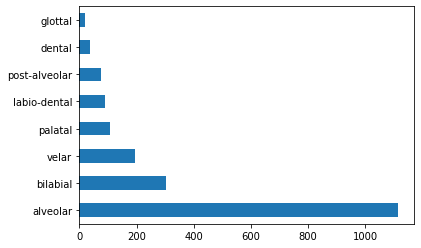

In [24]:
conplacecount = cons_dataframe.place.value_counts()
print(conplacecount)
conplacecount.plot(kind='barh')


True     1249
False     692
Name: voiced, dtype: int64


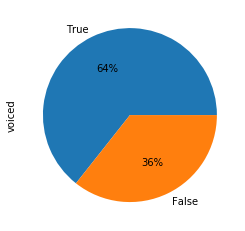

In [25]:
convoicecount = cons_dataframe.voiced.value_counts()
print(convoicecount)
convoicecount.plot(kind='pie', autopct='%1.0f%%')

There were a total of 1941 Consonant Phonemes across all of the words in the data. The most populous one was the phoneme 'n', an alveolar-nasal which occurred 198 times. This is in contrast to 'ʒ', a post-alveolar fricative which only occurred twice. These places reference either the tongue's position when the word is being spoken, or the part of the mouth being used to produce the sound. An alveolar means the alveolar ridge was used to produce the noise, while a bilabial means the lips were used. 

This spread of phones covers the majority of sounds in the english language and focuses mostly on the center-front area of the mouth. Nearly double the abount of phones were voiced compared to those unvoiced as evidenced above (all vowels are voiced). 

The spread of consonants is similar to the English language as a whole and represents fairly well which sounds are most frequently used.


In [34]:
vow_dataframe.describe()

,text,letters,height,placement,rounded
count,922,922,922,922,922
unique,13,13,7,5,2
top,ə,ə,mid,front,False
freq,245,245,245,330,827


ə    245
ɪ    170
ɛ     93
i     89
a     60
e     45
ɔ     44
æ     43
ʌ     43
ɑ     39
u     21
o     21
ʊ      9
Name: text, dtype: int64


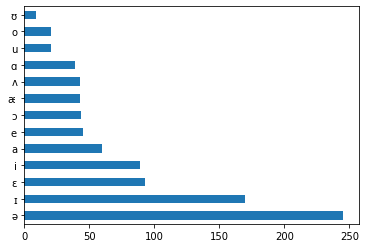

In [47]:
vow_counts = vow_dataframe.text.value_counts()
print(vow_counts)
vow_counts.plot(kind='barh')


In [36]:
print(vow_dataframe.height.value_counts())
print(vow_dataframe.placement.value_counts())

mid           245
open-mid      180
near-close    179
close         110
open           99
close-mid      66
near-open      43
Name: height, dtype: int64
front         330
central       245
near-front    170
back          168
near-back       9
Name: placement, dtype: int64


False    827
True      95
Name: rounded, dtype: int64


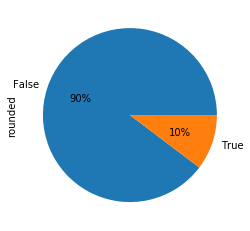

In [37]:
vowvoicecount = vow_dataframe.rounded.value_counts()
print(vowvoicecount)
vowvoicecount.plot(kind='pie', autopct='%1.0f%%')

There were a total of 922 vowel phonemes present in the data (close to half the number of consonants).

The range of vowels also focuses on the front-center area of the mouth, similar to the spread of the consonants. This trend is likely true in the English language as well though, so the distribution makes sense. The height category references the tounge placement when making the sound and covers the main 4 positions fairly closely and once again well matches the spread in the english language. 

Vowels tend to be unrounded more often than not, and specific dialects may change this distribution. So, the 90% unrounded is a very rough estimate and should not be taken too literally. 

The top 2 most common vowels make up the majority of the sounds across all of the words, with the rest being somewhat close in number of occurrances (excluding 'ʊ' which occurred 9 times). 


Across all of the data, the distribution of various phonemes closely matches their occurrence in the english language. These are all flexible though, as it can change depending on locational dialect, or even person to person. 